In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#Dosya yukleme
df = pd.read_csv('gelinlik.csv',encoding='utf-8')
df

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
0,Neslihanadanur,2B,"4,000 TL",S / 36,Prenses Gelinlik,NaN,NaN
1,cgla35,Milano,"1,300 TL",S / 36,A Kesim Gelinlik,4.0,NaN
2,gizem343819,Akay Gelinlik,250 TL,S,A Kesim Gelinlik,14.0,19.0
3,nergizzz02,Aysira,"2,500 TL",M / 38,A Kesim Gelinlik,7.0,5.0
4,bd87,Tasarım Ürünü,"1,100 TL",M / 38,Prenses Gelinlik,8.0,1.0
...,...,...,...,...,...,...,...
30428,2417dm,Angels,"2,300 TL",M / 38,A kesim,11.0,28.0
30429,omerarasm,Parlaistanbul,"2,000 TL",S / 36,Balık/ Trompet,1.0,NaN
30430,guvene35,Oleg Cassini,"1,500 TL",L / 40,Prenses,8.0,18.0
30431,asiaso,Pierre Cardin,"1,450 TL",S / 36,A kesim,1.0,NaN


In [ ]:
#İlk 5 veri
df.head()

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
0,Neslihanadanur,2B,"4,000 TL",S / 36,Prenses Gelinlik,NaN,NaN
1,cgla35,Milano,"1,300 TL",S / 36,A Kesim Gelinlik,4.0,NaN
2,gizem343819,Akay Gelinlik,250 TL,S,A Kesim Gelinlik,14.0,19.0
3,nergizzz02,Aysira,"2,500 TL",M / 38,A Kesim Gelinlik,7.0,5.0
4,bd87,Tasarım Ürünü,"1,100 TL",M / 38,Prenses Gelinlik,8.0,1.0


In [ ]:
#Column gozlemleme
df.columns

Index(['kullanicilar', 'markalar', 'fiyatlar', 'bedenler', 'kategori',
       'begeniler', 'yorumlar'],
      dtype='object')

In [ ]:
#Column bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30433 entries, 0 to 30432
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kullanicilar  30433 non-null  object 
 1   markalar      30433 non-null  object 
 2   fiyatlar      30433 non-null  object 
 3   bedenler      30433 non-null  object 
 4   kategori      30433 non-null  object 
 5   begeniler     26787 non-null  float64
 6   yorumlar      13866 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


In [ ]:
#Df boyut satır ve sütün
df.shape

(30433, 7)

In [5]:
#Fiyatlar columndaki Tl' yi kaldırma
df['fiyatlar'] = df['fiyatlar'].str.replace(',', '')
df['fiyatlar'] = df['fiyatlar'].str.strip('TL')
df['fiyatlar'] = pd.to_numeric(df['fiyatlar'],errors='coerce')
df['begeniler'] = pd.to_numeric(df['begeniler'],errors='coerce')
df['yorumlar'] = pd.to_numeric(df['yorumlar'],errors='coerce')
df['kategori'] = df['kategori'].astype('category')
df['markalar'] = df['markalar'].astype('category')
df['bedenler'] = df['bedenler'].astype('category')

In [ ]:
#Veri tipleri
df.dtypes

kullanicilar      object
markalar        category
fiyatlar           int64
bedenler        category
kategori        category
begeniler        float64
yorumlar         float64
dtype: object

In [ ]:
#İlk izlenim
print("Bu veri setinde {} adet observations ve {} adet feature var. \n".format(df.shape[0],df.shape[1]))

print("Bu veri setindeki {} adet benzersiz markalar veri tipi bulunur.  İlk 5 tanesi :  {}... \n".format(len(df.markalar.unique()),                                                                                                
                                                                           ", ".join(df.markalar.unique()[0:5])))

print("Bu veri setindeki {} adet benzersiz bedenler veri tipi bulunur. İlk 5 tanesi :  {}... \n".format(len(df.bedenler.unique()),                                                                                                
                                                                           " ".join(str(df.bedenler.unique()[0:5]))))
                                                                                      

Bu veri setinde 30433 adet observations ve 7 adet feature var. 

Bu veri setindeki 841 adet benzersiz markalar veri tipi bulunur.  İlk 5 tanesi :  2B, Milano, Akay Gelinlik, Aysira, Tasarım Ürünü... 

Bu veri setindeki 31 adet benzersiz bedenler veri tipi bulunur. İlk 5 tanesi :  [ S   /   3 6 ,   S ,   M   /   3 8 ,   T e k   B e d e n ,   X X L   /   4 4 ] 
 C a t e g o r i e s   ( 3 1 ,   o b j e c t ) :   [ S   /   3 6 ,   S ,   M   /   3 8 ,   T e k   B e d e n ,   . . . ,   2 0 ,   1 4 ,   X L ,   3 2 ]... 



In [ ]:
#Betimsel istatistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyatlar,30433.0,1555.052706,4323.790822,1.0,600.0,1100.0,2000.0,599999.0
begeniler,26787.0,4.046888,5.779805,1.0,1.0,2.0,4.0,116.0
yorumlar,13866.0,5.644454,8.670659,1.0,1.0,3.0,6.0,180.0


In [ ]:
#Kategori columnuna göre gruplama ve sıralama
g = df.groupby('kategori').size()
g.sort_values(ascending=False)

kategori
A kesim               10814
Prenses                7670
Balık/ Trompet         3619
Sade Gelinlik          3566
A Kesim Gelinlik       1268
Vintage Gelinlik       1230
Prenses Gelinlik        791
Mini Gelinlik           656
Kılıf/Düz Gelinlik      633
Atkı/Şal                185
Resmi Gece                1
dtype: int64

In [ ]:
#Bedenler column beden sayıları
df.groupby('bedenler').size()

bedenler
0              661
10              79
12              30
14               9
16               4
2              535
20               3
32               1
33               4
3XL / 46       192
4              155
4XL / 48        69
5XL / 50        30
6              241
6XL / 52        23
7XL / 54        29
8              220
L              136
L / 40        2299
M              821
M / 38       10543
S              984
S / 36        9531
Tek Beden      271
XL              43
XL / 42       1063
XS             107
XS / 34       1705
XXL             13
XXL / 44       367
XXS / 32       265
dtype: int64

In [ ]:
#Kategori kolonu betimsel istatistikler (A kesim 2 tane var birleştireceğiz)
df.groupby('kategori').describe().T

kategori         A Kesim Gelinlik  ...  Vintage Gelinlik
fiyatlar  count       1268.000000  ...       1230.000000
          mean        1780.518139  ...       1457.115447
          std         1736.147850  ...       1600.272842
          min            5.000000  ...          5.000000
          25%          750.000000  ...        450.000000
          50%         1425.000000  ...       1000.000000
          75%         2400.000000  ...       2000.000000
          max        20000.000000  ...      20000.000000
begeniler count       1016.000000  ...       1078.000000
          mean           5.694882  ...          5.949907
          std            7.942615  ...          7.719388
          min            1.000000  ...          1.000000
          25%            1.000000  ...          1.000000
          50%            3.000000  ...          3.000000
          75%            7.000000  ...          7.000000
          max           67.000000  ...         60.000000
yorumlar  count        534.000000  ...        577.000000
          mean           8.612360  ...          6.415945
          std           15.269607  ...          8.382581
          min            1.000000  ...          1.000000
          25%            2.000000  ...          2.000000
          50%            3.000000  ...          3.000000
          75%            7.000000  ...          8.000000
          max          138.000000  ...         65.000000

[24 rows x 11 columns]

In [ ]:
#Kategori değişkeni içerisinddeki A kesim Gelinlik kategorisini A kesim ile birleştirdik
df['kategori'] = df['kategori'].str.replace('A Kesim Gelinlik','A kesim')
df.groupby('kategori').describe().T

kategori               A kesim     Atkı/Şal  ...  Sade Gelinlik  Vintage Gelinlik
fiyatlar  count   12082.000000   185.000000  ...    3566.000000       1230.000000
          mean     1719.569111   602.681081  ...    1175.528603       1457.115447
          std      6577.865111   750.126888  ...    1423.715546       1600.272842
          min         5.000000     5.000000  ...       5.000000          5.000000
          25%       750.000000    89.000000  ...     350.000000        450.000000
          50%      1250.000000   250.000000  ...     800.000000       1000.000000
          75%      2000.000000   900.000000  ...    1500.000000       2000.000000
          max    599999.000000  4000.000000  ...   31225.000000      20000.000000
begeniler count   10737.000000   163.000000  ...    3091.000000       1078.000000
          mean        3.687809     3.435583  ...       4.917179          5.949907
          std         5.094282     3.487255  ...       7.328598          7.719388
          min         1.000000     1.000000  ...       1.000000          1.000000
          25%         1.000000     1.000000  ...       1.000000          1.000000
          50%         2.000000     2.000000  ...       2.000000          3.000000
          75%         4.000000     4.000000  ...       5.000000          7.000000
          max        83.000000    18.000000  ...      91.000000         60.000000
yorumlar  count    5687.000000    26.000000  ...    1578.000000        577.000000
          mean        5.815368     3.346154  ...       5.621673          6.415945
          std         9.763904     3.815152  ...       8.263309          8.382581
          min         1.000000     1.000000  ...       1.000000          1.000000
          25%         1.000000     1.000000  ...       1.000000          2.000000
          50%         3.000000     2.000000  ...       3.000000          3.000000
          75%         6.000000     4.000000  ...       6.000000          8.000000
          max       180.000000    13.000000  ...      72.000000         65.000000

[24 rows x 10 columns]

In [ ]:
#!BEGENİLER BOLUMU
#En cok begenilen kategori A Kesim = 10737 & En az begenilen kategori Resmi Gece = 1 
# 1 üründe en fazla beğeni alan kategori 116 beğeniyle Kılıf Düz Gelinlik Kategorisi
#Ortalama en fazla beğeni alan kategori Mini gelinlik kategorisi

#!FIYATLAR BOLUMU
# Maksimum fiyatlar 599999 TL fiyatıyla A kesim kategorisinde bulunuyor 
# Minimum fiyatlar 4000 TL fiyatıyla Atkı Şal kategorisinde bulunuyor
# En yüksek fiyat ortalamasına sahıp 1953 TL ile Prenses Gelinlik

#!YORUMLAR BOLUMU
#En cok yorum alan kategori A Kesim = 5687 & En az begenilen kategori Resmi Gece = 1
# 1 üründe en fazla yorum alan kategori 180 yorumla A kesim
#Ortalama en fazla yorum alan kategori Vintage Gelinlik




In [ ]:
en_fazla_begeni_alan_kategori = df[(df['begeniler'] == 116) & (df['kategori'] == "Kılıf/Düz Gelinlik")]
en_fazla_begeni_alan_kategori

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
13407,kubrakayya,Dreamon Gelinlik,1500,XS / 34,Kılıf/Düz Gelinlik,116.0,85.0


In [ ]:
min_a_kesim_fiyatlar = df[(df['fiyatlar'] == 5) & (df['kategori'] == "A kesim")]
min_a_kesim_fiyatlar

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
708,sul123,Zara,5,M / 38,A kesim,NaN,NaN
2816,seher530,Park Bravo,5,M / 38,A kesim,NaN,NaN
2817,seher530,Park Bravo,5,M / 38,A kesim,NaN,NaN
2818,seher530,Park Bravo,5,M / 38,A kesim,NaN,NaN
2819,seher530,Park Bravo,5,M / 38,A kesim,3.0,3.0
2820,seher530,Park Bravo,5,M / 38,A kesim,2.0,NaN
2833,Hayatiniyasa,Adidas,5,3XL / 46,A kesim,NaN,NaN
4353,berrin333,Markasız Ürün,5,S / 36,A kesim,NaN,NaN
7817,nurellaaa97,1000 Hour,5,M / 38,A kesim,NaN,NaN
7874,gizemk000,Tasarım Ürünü,5,XS / 34,A kesim,8.0,2.0


In [ ]:
en_cok_yorum = df[(df['yorumlar'] == 180) & (df['kategori'] == "A kesim")]
en_cok_yorum

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
13306,jasjus,Ivory,5000,XS / 34,A kesim,83.0,180.0


In [ ]:
#Bir tl gelinliği listeleme

bir_tl_gelinlik = df[df.fiyatlar == 1]
bir_tl_gelinlik

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
27321,gskarman,Bianco,1,M / 38,Balık/ Trompet,5.0,6.0


In [ ]:
#En yüksek fiyatlı gelinliği listeleme

yuksek_fiyat = df[df.fiyatlar == 599999]
yuksek_fiyat

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
21542,Cansun89,1000 Hour,599999,M / 38,A kesim,1.0,3.0


In [ ]:
df.kategori.value_counts()

A kesim               12082
Prenses                7670
Balık/ Trompet         3619
Sade Gelinlik          3566
Vintage Gelinlik       1230
Prenses Gelinlik        791
Mini Gelinlik           656
Kılıf/Düz Gelinlik      633
Atkı/Şal                185
Resmi Gece                1
Name: kategori, dtype: int64

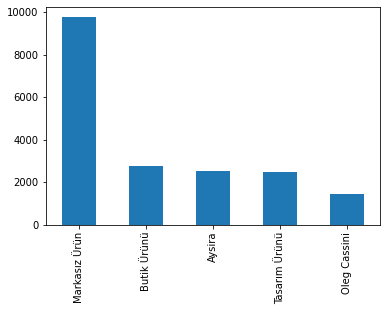

In [ ]:
#Adet sayısı en fazla 5 markayı alma
df.markalar.value_counts().nlargest().plot(kind="bar")

In [ ]:
#Markalara ve bedenlere gore gruplandırıp fiyatlara göre sıralama
gb = df.groupby(['markalar', 'bedenler'])
gb.apply(lambda _df: _df.sort_values(by=['fiyatlar']))

kullanicilar  ... yorumlar
markalar                      bedenler                         ...         
1000 Hour                     0        23139          patigen  ...      4.0
                                       23308          patigen  ...      4.0
                                       23802         ccananca  ...      8.0
                                       25137          happy06  ...      4.0
                                       11409    yagmurhaziran  ...      6.0
...                                                       ...  ...      ...
İrem Yıldırım                 M / 38   14350      cruzer28024  ...      3.0
İrfan Home                    S / 36   1492   yepyenilerburda  ...      1.0
Şinasi Günaydın Haute Couture M        14052     filizzzzzz07  ...     10.0
                                       14063     filizzzzzz07  ...     10.0
                              S / 36   10227     selviabali67  ...      NaN

[30433 rows x 7 columns]

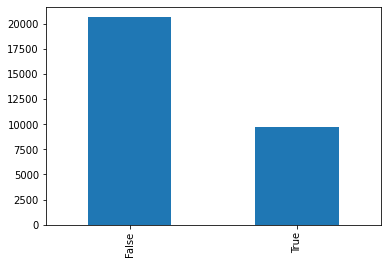

In [ ]:
markasız_ürün = df.markalar.str.contains("Markasız Ürün")
pd.DataFrame(markasız_ürün)
markasız_ürün.value_counts().plot(kind="bar")
plt.show()


In [ ]:
markasız_ürün.value_counts()

False    20680
True      9753
Name: markalar, dtype: int64

In [ ]:
#Markalar ve fiyatlar çaprazlama
pd.crosstab(df.markalar,df.fiyatlar)

fiyatlar,1,5,6,7,10,11,12,13,14,15,17,18,19,20,22,23,25,27,28,29,30,31,32,35,37,38,40,42,43,44,45,46,48,49,50,53,54,55,56,57,...,8475,8500,8750,9000,9025,9100,9500,9900,9999,10000,10050,10500,11000,11500,12000,13500,14000,14500,14900,15000,15500,16000,16500,17000,18000,19000,19500,20000,21250,25000,28000,31225,35000,49999,60066,94999,121250,133750,218750,599999
markalar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1000 Hour,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,3,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17 Sundays,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1v1y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2 Star,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2 Ters 1 Düz,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
İpekevi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
İpekyol,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,2,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
İrem Yıldırım,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Kategori ve fiyatlar caprazlama
pd.crosstab(df.kategori,df.fiyatlar)

fiyatlar,1,5,6,7,10,11,12,13,14,15,17,18,19,20,22,23,25,27,28,29,30,31,32,35,37,38,40,42,43,44,45,46,48,49,50,53,54,55,56,57,...,8475,8500,8750,9000,9025,9100,9500,9900,9999,10000,10050,10500,11000,11500,12000,13500,14000,14500,14900,15000,15500,16000,16500,17000,18000,19000,19500,20000,21250,25000,28000,31225,35000,49999,60066,94999,121250,133750,218750,599999
kategori,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A kesim,0,18,1,0,8,0,1,1,0,4,1,1,0,4,0,0,12,0,0,0,13,0,0,8,0,1,14,0,0,0,10,0,1,0,19,0,0,7,0,0,...,0,2,1,5,0,0,0,0,0,16,0,0,1,0,5,0,0,1,1,8,0,1,0,2,0,1,0,5,0,0,0,0,0,2,1,1,1,1,2,1
Atkı/Şal,0,2,0,0,12,0,1,0,0,2,0,0,0,4,0,0,2,0,0,0,3,0,0,3,0,1,0,0,0,1,2,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Balık/ Trompet,1,2,0,0,3,0,3,0,0,0,0,0,1,1,0,0,3,0,0,0,2,0,0,3,0,0,5,0,0,0,5,0,1,1,2,1,0,0,0,0,...,1,1,0,6,0,0,2,1,0,9,2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
Kılıf/Düz Gelinlik,0,1,0,1,1,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,2,0,0,0,2,0,0,0,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mini Gelinlik,0,1,0,0,3,1,1,0,0,4,0,0,0,3,0,0,6,1,1,0,7,0,0,5,0,0,10,2,0,0,5,0,0,0,18,0,1,3,1,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Prenses,0,9,0,0,8,0,0,0,1,2,1,0,0,7,0,0,6,0,0,0,10,1,2,9,0,0,11,0,1,0,8,1,0,1,20,1,0,7,0,0,...,0,5,0,3,1,0,1,0,0,2,0,0,1,0,2,0,1,2,0,12,0,0,4,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0
Prenses Gelinlik,0,3,0,0,1,0,0,0,1,1,0,0,0,2,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,2,0,0,0,6,0,0,4,0,0,...,0,2,0,0,0,1,2,0,0,7,0,2,2,1,3,2,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Resmi Gece,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Sade Gelinlik,0,8,0,0,3,0,1,0,0,1,0,0,0,5,0,0,4,1,0,1,1,0,0,9,1,0,9,0,0,0,7,0,0,0,26,0,0,2,1,0,...,0,3,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Gelinlik kategorisindeki 2000 Tl ve üzeri ürünlerin markalarını ve fiyatlarını ve kategori listeleme
fiyat_ikibin_uzeri_marka = df[(df['fiyatlar'] >= 2000)][["markalar","fiyatlar","kategori"]]
fiyat_ikibin_uzeri_marka = pd.DataFrame(fiyat_ikibin_uzeri_marka)
fiyat_ikibin_uzeri_marka.reset_index(inplace=True)
fiyat_ikibin_uzeri_marka.drop('index',axis=1,inplace=True)
fiyat_ikibin_uzeri_marka

,markalar,fiyatlar,kategori
0,2B,4000,Prenses Gelinlik
1,Aysira,2500,A kesim
2,Pierre Cardin,2500,Prenses Gelinlik
3,Aysira,2500,Prenses Gelinlik
4,Miss Defne,4500,Vintage Gelinlik
...,...,...,...
8161,Dai Gelinlik,2500,Balık/ Trompet
8162,Pronovias,5000,Balık/ Trompet
8163,Angels,2300,A kesim
8164,Parlaistanbul,2000,Balık/ Trompet


In [ ]:
#Fiyatı 2000 Tl üzeründe olan ürünlerden hangi markadan kaç adet var
fiyat_ikibin_uzeri_marka.markalar.value_counts()

Markasız Ürün    1885
Aysira            820
Tasarım Ürünü     793
Butik Ürünü       639
Pronovias         547
                 ... 
Kipling             0
Kikiriki            0
Kenzie              0
Kemal Tanca         0
H&M Home            0
Name: markalar, Length: 841, dtype: int64

In [ ]:
#Fiyatı 2000 Tl üzerinden olan ürünler hangi kategoriden kaç adet var
fiyat_ikibin_uzeri_marka.kategori.value_counts()

A kesim               3530
Prenses               1876
Balık/ Trompet        1311
Sade Gelinlik          678
Vintage Gelinlik       336
Prenses Gelinlik       251
Kılıf/Düz Gelinlik     128
Mini Gelinlik           40
Atkı/Şal                16
Name: kategori, dtype: int64

In [ ]:
#Gelinlik kategorisindeki 2000 Tl ve üzeri ürünlerin markalarını ve fiyatlarını ve kategori listeleme
df.yorumlar = df.yorumlar.fillna(0)
df.begeniler = df.begeniler.fillna(0)
fiyat_ikibin_uzeri_fiyatlar_yorumlar = df[(df['fiyatlar'] >= 2000)][["begeniler","yorumlar","fiyatlar","kategori","bedenler"]]
fiyat_ikibin_uzeri_fiyatlar_yorumlar = pd.DataFrame(fiyat_ikibin_uzeri_fiyatlar_yorumlar)
fiyat_ikibin_uzeri_fiyatlar_yorumlar.reset_index(inplace=True)
fiyat_ikibin_uzeri_fiyatlar_yorumlar.drop('index',axis=1,inplace=True)
fiyat_ikibin_uzeri_fiyatlar_yorumlar.to_csv('fiyat_ikibin_uzeri_fiyatlar_yorumlar.csv')
fiyat_ikibin_uzeri_fiyatlar_yorumlar

,begeniler,yorumlar,fiyatlar,kategori,bedenler
0,0.0,0.0,4000,Prenses Gelinlik,S / 36
1,7.0,5.0,2500,A kesim,M / 38
2,0.0,0.0,2500,Prenses Gelinlik,S / 36
3,1.0,0.0,2500,Prenses Gelinlik,XXL / 44
4,2.0,0.0,4500,Vintage Gelinlik,M / 38
...,...,...,...,...,...
8161,13.0,3.0,2500,Balık/ Trompet,S / 36
8162,8.0,5.0,5000,Balık/ Trompet,S / 36
8163,11.0,28.0,2300,A kesim,M / 38
8164,1.0,0.0,2000,Balık/ Trompet,S / 36


In [ ]:
#Begeniler ve fiyatlar caprazlama
pd.crosstab(df.begeniler,df.fiyatlar)

fiyatlar,1,5,6,7,10,11,12,13,14,15,17,18,19,20,22,23,25,27,28,29,30,31,32,35,37,38,40,42,43,44,45,46,48,49,50,53,54,55,56,57,...,8475,8500,8750,9000,9025,9100,9500,9900,9999,10000,10050,10500,11000,11500,12000,13500,14000,14500,14900,15000,15500,16000,16500,17000,18000,19000,19500,20000,21250,25000,28000,31225,35000,49999,60066,94999,121250,133750,218750,599999
begeniler,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,16,1,0,16,0,0,0,0,4,2,0,1,17,0,0,5,1,0,1,10,0,0,9,0,0,9,1,0,0,8,0,1,1,22,0,0,2,0,0,...,0,1,0,3,0,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.0,0,8,0,0,11,1,1,0,0,6,0,0,0,4,0,1,7,0,1,0,12,0,0,7,1,0,12,0,0,0,7,0,1,0,19,1,0,2,0,0,...,0,2,1,4,0,0,1,0,1,7,0,0,0,1,1,0,0,0,0,8,0,0,0,0,0,0,0,2,0,0,0,1,0,2,1,1,1,1,0,1
2.0,0,9,0,0,4,0,2,0,0,4,0,0,0,0,0,0,5,1,0,0,3,1,0,4,0,0,9,0,0,0,8,1,0,0,21,0,0,1,0,0,...,0,5,0,0,0,0,4,1,0,10,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0
3.0,0,5,0,2,5,0,1,1,1,3,0,0,0,1,1,0,6,0,0,0,5,0,0,9,0,0,3,0,0,0,8,0,0,0,6,0,0,3,1,0,...,1,0,0,2,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,2,0,0,3,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,1,4,0,0,0,9,0,0,7,0,0,...,0,3,0,2,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#91 begenı olan urun fıyatını gozlemleme
doksanbir_begeni = df[(df['begeniler'] == 91)]["fiyatlar"]
doksanbir_begeni

13400    1000
Name: fiyatlar, dtype: int64

In [ ]:
#91 begenı  ve fıyatı 1000 tl olan urunu gozlemleme
df[(df['fiyatlar'] == 1000) & (df['begeniler'] == 91)]

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
13400,fufufat,Henna Gelinlik,1000,S / 36,Sade Gelinlik,91.0,13.0


In [ ]:
#116 begenı olan urunun fıyatlarını gozlemleme
yuz_onaltı_begeni = df[(df['begeniler'] == 116)]["fiyatlar"]
yuz_onaltı_begeni

13407    1500
Name: fiyatlar, dtype: int64

In [ ]:
#1500 tl fiyatlı ve 116 begenısı olan ürünü gozlemleme
df[(df['fiyatlar'] == 1500) & (df['begeniler'] == 116)]

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
13407,kubrakayya,Dreamon Gelinlik,1500,XS / 34,Kılıf/Düz Gelinlik,116.0,85.0


In [ ]:

max(df.begeniler)

116.0

In [ ]:
min(df.begeniler)

0.0

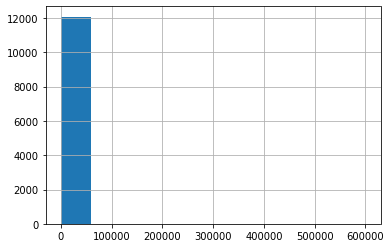

In [ ]:
df[df["kategori"]=="A kesim"]["fiyatlar"].hist()

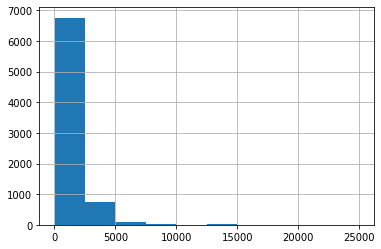

In [ ]:
df[df["kategori"]=="Prenses"]["fiyatlar"].hist()

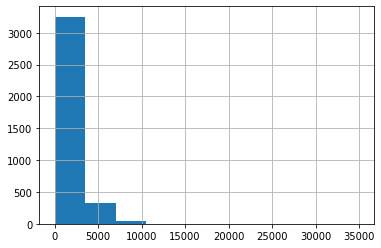

In [ ]:
df[df["kategori"]=="Balık/ Trompet"]["fiyatlar"].hist()

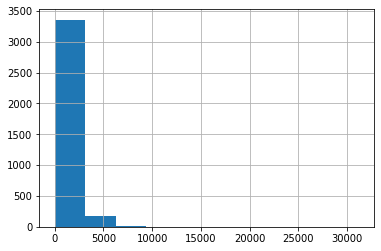

In [ ]:
df[df["kategori"]=="Sade Gelinlik"]["fiyatlar"].hist()

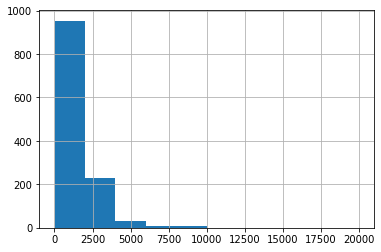

In [ ]:
df[df["kategori"]=="Vintage Gelinlik"]["fiyatlar"].hist()

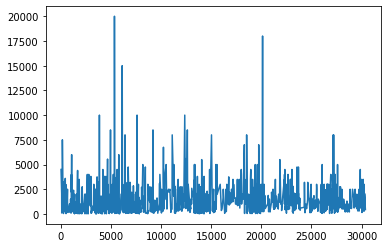

In [ ]:
df[df["kategori"]=="Vintage Gelinlik"]["fiyatlar"].plot(kind="line")

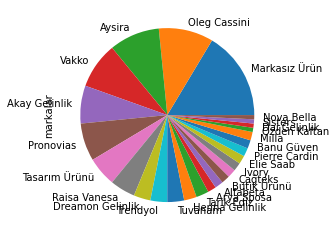

In [ ]:
#Yorum veya begeni sayısı 50 den fazla olan markaları listele
abc = df[(df['yorumlar']  > 50) | (df['begeniler'] >50)]["markalar"]
abc.value_counts().plot(kind="pie")
abc.value_counts()

In [ ]:
#Begeni sayısı 75 den fazla olup fiyati 2000 den fazla olanlar
abf = df[(df['begeniler']  > 75) & (df['fiyatlar'] >2000)]
abf.markalar.value_counts()


Sade Gelinlik     3
Balık/ Trompet    2
A kesim           1
Name: kategori, dtype: int64

In [ ]:
#2000 den fazla olanların kategorisi
abf.kategori.value_counts()

Sade Gelinlik     3
Balık/ Trompet    2
A kesim           1
Name: kategori, dtype: int64

In [ ]:
abg = df[(df['begeniler']  > 75) & (df['fiyatlar'] >2000) & (df['kategori'] == "A kesim")]
abg.markalar.value_counts()

Ivory              1
Dantelle           0
Danielle Nicole    0
Daniel Rainn       0
Damo               0
                  ..
Miss Defne         0
Miss Beanie        0
Miss Ageless       0
Miroa              0
1000 Hour          0
Name: markalar, Length: 841, dtype: int64

In [ ]:
#Kaç farklı marka var
len(df.markalar.unique())



841

In [ ]:
#Kaç farklı kullanıcı var

len(df.kullanicilar.unique())

21581

In [ ]:
#En çok tekrar eden kullanıcı
df.kullanicilar.mode()

0    rentisthenewchic
dtype: object

In [ ]:
rentisthenewchic = df[(df["kullanicilar"] == "rentisthenewchic")]
rentisthenewchic

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
3730,rentisthenewchic,Markasız Ürün,2500,L / 40,A kesim,4.0,NaN
4128,rentisthenewchic,Markasız Ürün,1400,S / 36,Kılıf/Düz Gelinlik,9.0,NaN
6415,rentisthenewchic,Markasız Ürün,3000,S / 36,A kesim,1.0,5.0
6592,rentisthenewchic,Theia,2000,S / 36,Kılıf/Düz Gelinlik,NaN,NaN
6593,rentisthenewchic,Theia,2000,S / 36,Kılıf/Düz Gelinlik,5.0,NaN
6594,rentisthenewchic,Niquie,3500,S / 36,A kesim,7.0,1.0
6595,rentisthenewchic,Markasız Ürün,750,XS / 34,Kılıf/Düz Gelinlik,11.0,NaN
6596,rentisthenewchic,Markasız Ürün,1500,S / 36,Kılıf/Düz Gelinlik,6.0,NaN
8193,rentisthenewchic,Markasız Ürün,2000,M / 38,Mini Gelinlik,6.0,NaN
8194,rentisthenewchic,Markasız Ürün,2000,M / 38,Mini Gelinlik,4.0,2.0


In [ ]:
#Kullanıcının kac urunu var
len(rentisthenewchic)

40

In [ ]:
#Kullanıcının maksimum fiyatları
max(rentisthenewchic.fiyatlar)

20000

In [ ]:
#En pahalı ürününü gözlemleme
rentisthenewchic[(rentisthenewchic["fiyatlar"] == 20000)]

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
13901,rentisthenewchic,Tasarım Ürünü,20000,S / 36,Balık/ Trompet,41.0,7.0


In [ ]:
#Kullanıcının minimum fiyatları
min(rentisthenewchic.fiyatlar)

228

In [ ]:
#Kullanıcını en ucuz fıyatını gozlemleme
rentisthenewchic[(rentisthenewchic["fiyatlar"] == 228)]

,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar
10980,rentisthenewchic,Markasız Ürün,228,S / 36,Mini Gelinlik,7.0,6.0


In [ ]:
#Kullanıcı betimsel istatistikler
rentisthenewchic.describe().T

,count,mean,std,min,25%,50%,75%,max
fiyatlar,40.0,2794.575,3007.001436,228.0,1552.5,2500.0,3335.75,20000.0
begeniler,40.0,9.725,9.265285,0.0,4.0,7.0,14.25,41.0
yorumlar,40.0,2.500,3.343574,0.0,0.0,1.0,4.00,14.0


In [ ]:
#Kullanıcının hangi kategoriden kac urunu var
rentisthenewchic.kategori.value_counts(ascending=False)


Kılıf/Düz Gelinlik    17
A kesim               11
Mini Gelinlik          6
Sade Gelinlik          3
Balık/ Trompet         3
Name: kategori, dtype: int64

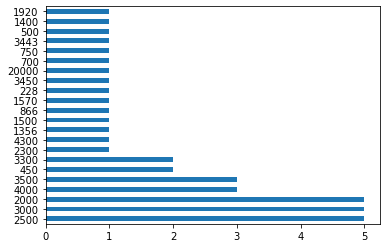

In [ ]:
#Kullanici fiyalar grafigi
rentisthenewchic.fiyatlar.value_counts().plot(kind="barh")

In [ ]:
#Markalara göre gruplandırıp fiyatların min ve max değerini begenilerin min ve max degerini alma
df.groupby("markalar").agg({'fiyatlar' : ['min', 'max'], 'begeniler' : ['min', 'max']})

fiyatlar         begeniler      
                                   min     max       min   max
markalar                                                      
1000 Hour                            5  599999       0.0  17.0
17 Sundays                          70    2500       0.0  14.0
1v1y                                50    5400       0.0  19.0
2 Star                               5    4500       0.0  24.0
2 Ters 1 Düz                         7    2500       0.0   9.0
...                                ...     ...       ...   ...
İpekevi                            100    2700       1.0  22.0
İpekyol                             30    5000       0.0  30.0
İrem Yıldırım                     2200    2200       7.0   7.0
İrfan Home                         150     150       1.0   1.0
Şinasi Günaydın Haute Couture      950    1350       1.0   2.0

[841 rows x 4 columns]

In [ ]:
#Fiyatlara gore gruplandırıp yorumların ve begenilerin min ve max degerini alma
df.groupby("fiyatlar").agg({'yorumlar' : ['min', 'max'], 'begeniler' : ['min', 'max']})

yorumlar      begeniler      
              min  max       min   max
fiyatlar                              
1             6.0  6.0       5.0   5.0
5             0.0  7.0       0.0   8.0
6             0.0  0.0       0.0   0.0
7             0.0  0.0       3.0   3.0
10            0.0  4.0       0.0  11.0
...           ...  ...       ...   ...
94999         3.0  3.0       1.0   1.0
121250        0.0  0.0       1.0   1.0
133750        0.0  0.0       1.0   1.0
218750        4.0  4.0       2.0   2.0
599999        3.0  3.0       1.0   1.0

[820 rows x 4 columns]

In [ ]:
#Kategori ve markalara göre gruplandırıp fiyatlar yorumlar ve begenilerin min ve max degerini alma
dsd = df.groupby(["kategori","markalar"]).agg({'fiyatlar' : ['min','max'], 'begeniler' : ['min', 'max'],'yorumlar' : ['min','max']})
dsd

fiyatlar  ... yorumlar
                                                    min  ...      max
kategori         markalar                                ...         
A kesim          1000 Hour                          5.0  ...     27.0
                 17 Sundays                       550.0  ...      2.0
                 1v1y                              50.0  ...     16.0
                 2 Star                             5.0  ...      4.0
                 2 Ters 1 Düz                      30.0  ...     36.0
...                                                 ...  ...      ...
Vintage Gelinlik İpekevi                         2450.0  ...      3.0
                 İpekyol                           80.0  ...      2.0
                 İrem Yıldırım                      NaN  ...      NaN
                 İrfan Home                         NaN  ...      NaN
                 Şinasi Günaydın Haute Couture      NaN  ...      NaN

[8410 rows x 6 columns]

In [ ]:
#Kategori ve fiyatlara gore gruplandırılmıs dosyasıyla kaydetme
dsd.to_csv('denemeler.csv')

In [ ]:
#Kac farklı kategori var
len(df.kategori.unique())

10

In [ ]:
#Fiyatları gruplandırma
df.fiyatlar = df.fiyatlar.fillna(0)
df['fiyat_grup'] = pd.qcut(df['fiyatlar'], q = 5)
df


,kullanicilar,markalar,fiyatlar,bedenler,kategori,begeniler,yorumlar,fiyat_grup
0,Neslihanadanur,2B,4000,S / 36,Prenses Gelinlik,0.0,0.0,"(2200.0, 599999.0]"
1,cgla35,Milano,1300,S / 36,A kesim,4.0,0.0,"(950.0, 1500.0]"
2,gizem343819,Akay Gelinlik,250,S,A kesim,14.0,19.0,"(0.999, 500.0]"
3,nergizzz02,Aysira,2500,M / 38,A kesim,7.0,5.0,"(2200.0, 599999.0]"
4,bd87,Tasarım Ürünü,1100,M / 38,Prenses Gelinlik,8.0,1.0,"(950.0, 1500.0]"
...,...,...,...,...,...,...,...,...
30428,2417dm,Angels,2300,M / 38,A kesim,11.0,28.0,"(2200.0, 599999.0]"
30429,omerarasm,Parlaistanbul,2000,S / 36,Balık/ Trompet,1.0,0.0,"(1500.0, 2200.0]"
30430,guvene35,Oleg Cassini,1500,L / 40,Prenses,8.0,18.0,"(950.0, 1500.0]"
30431,asiaso,Pierre Cardin,1450,S / 36,A kesim,1.0,0.0,"(950.0, 1500.0]"


In [ ]:
#Fiyatlara gore gruplandırılan degerlerı goruntuleme
df.fiyat_grup.value_counts()

(950.0, 1500.0]       7733
(0.999, 500.0]        6491
(2200.0, 599999.0]    6046
(500.0, 950.0]        5900
(1500.0, 2200.0]      4263
Name: fiyat_grup, dtype: int64

In [ ]:
#Rastgele gozlem secımı
df1 = df[df["markalar"]== "1000 Hour"] 
df_s1 = df1.sample(n=50,random_state=1)
df_s1["fiyatlar"].mean() 

1448.22

In [ ]:
import numpy as np
#Bootstrap 
#istatiksel çıkarım yapmak amacıyla olarak populasyondan n sayıda örneklem çıkarmak anlamında kullanbılırız
#np.random.choice()
boot = np.random.choice(df["fiyatlar"],size=100)
boot = pd.DataFrame(boot)
boot.describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,1414.97,1141.90458,28.0,737.5,1025.0,1675.0,6000.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


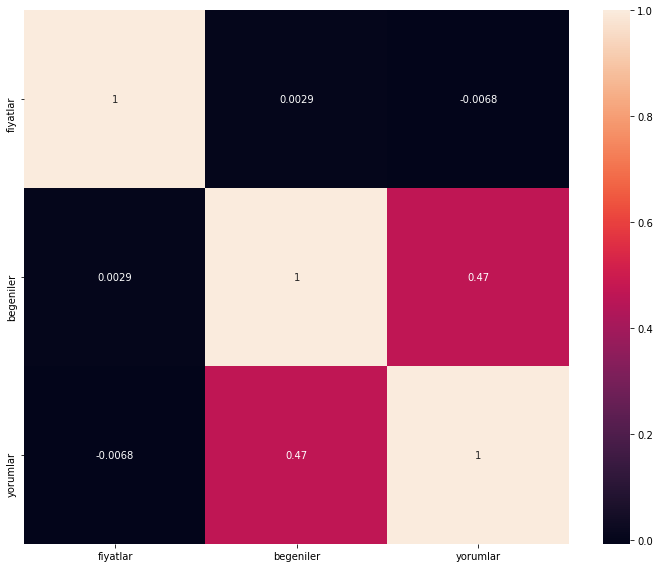

In [ ]:
#Degiskenler arası korelasyon
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True)
plt.tight_layout()
plt.show()

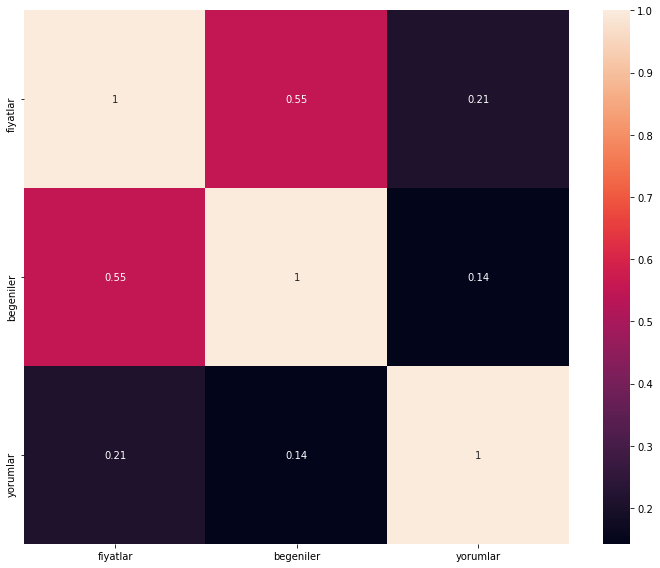

In [ ]:
#Rentisthenewchic kullanıcı degıskenler arasındakı ılıskı
plt.figure(figsize = (10, 8))
sns.heatmap(rentisthenewchic.corr(), annot=True)
plt.tight_layout()
plt.show()

In [ ]:
#Calısma zamanı duraklatıldıgı ıcın fiyatlar ve begeniler kolonundakı bos verıler tekrardan 0 ıle dolduruldu
df.fiyatlar = df.fiyatlar.fillna(0)
df.begeniler = df.begeniler.fillna(0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

bagimsiz = df['begeniler'].values.reshape(-1, 1) #Bagımsız ozellik (bagımlı degıskenı tahmın etmeye yarayan degısken)
bagimli = df['fiyatlar'].values #Bagımlı ozellik (tahmin etmek için hedeflediğimiz ana degisken)

In [ ]:
model.fit(bagimsiz,bagimli)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Sabit degisken
model.intercept_

1539.6680331172342

In [ ]:
#Katsayı
model.coef_

array([4.31904494])

In [ ]:
#Basit doğrusal regresyonun model denklemi (formulu) : y = a + bx
# İntercept : Model denkleminde yer alan b0 degeridir.Yukseklık de denılır
# Coef : Model denkleminde yer alan b1,b2,.... bp şeklindedir.

print("Formül: "+str(model.intercept_) + " " + "+" + " "+str(model.coef_)+"x1") 

Formül: 1539.6680331172342 + [4.31904494]x1


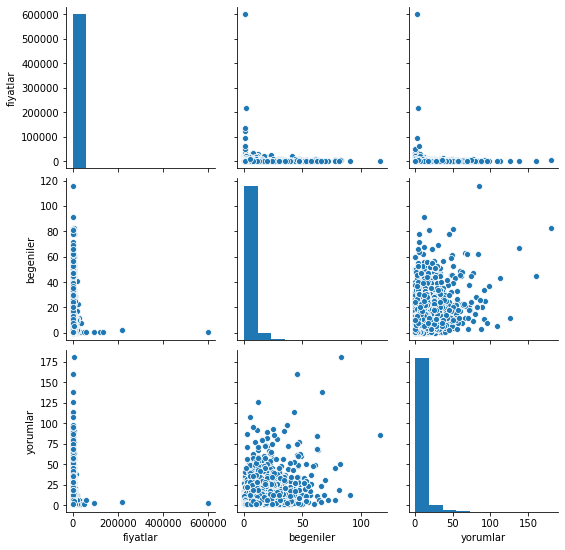

In [ ]:
sns.pairplot(df)